## Sentimental Analysis

### EDA

In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv("/kaggle/input/sentiment-analysis-dataset/training.1600000.processed.noemoticon.csv" ,encoding='iso-8859-1')
df = pd.read_csv("train.csv" ,encoding='iso-8859-1')

In [3]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [5]:
df.describe()

,polarity of tweet,id of the tweet
count,1.048572e+06,1.048572e+06
mean,9.482458e-01,1.976168e+09
std,1.701122e+00,2.300567e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990870e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


In [6]:
df.shape

(1048572, 6)

#### Missing Values

In [7]:
[feature for feature in df.columns if df[feature].isnull().sum()>=1]

[]

#### Insights from dataset

In [8]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')


In [9]:
# different classes of target label
df['polarity of tweet'].value_counts()

polarity of tweet
0    799996
4    248576
Name: count, dtype: int64

In [10]:
# which columns are not important remove them 
df.head(2)

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [11]:
# except polarity of tweet and text of the tweet all other are not important column to us for sentimental analysis
df.drop(columns=['id of the tweet' , 'date of the tweet' , 'query' , 'user'],inplace=True)

In [12]:
df.head(2)

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...


#### Imbalanced dataset

In [13]:
df['polarity of tweet'].value_counts()

polarity of tweet
0    799996
4    248576
Name: count, dtype: int64

In [14]:
# # spliting the data into independent feature and target label
# X = df['text of the tweet']
# Y = df['polarity of tweet']

In [15]:
# # Implementing Oversampling for Handling Imbalanced 
# from imblearn.combine import SMOTETomek
# smk = SMOTETomek(random_state=42)
# X_res,y_res=smk.fit_resample(X,Y)



# from collections import Counter
# print('Original dataset shape {}'.format(Counter(Y)))
# print('Resampled dataset shape {}'.format(Counter(y_res)))


In [16]:
# Y_bal.value_counts()

In [17]:
# we will doing down sampling in this case

### 

Machine Learning Algorithm

In [18]:
# Supervised Learning -> Neural Network in tensorflow , NLP

#### Preprocess the text data 

In [19]:
# !pip install nltk

In [20]:
df.head(2)

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...


In [21]:
import nltk

In [22]:
df['text of the tweet'][1]

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

In [23]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
removed = []
stopword = stopwords.words('english')
print(len(stopword))
for i in stopword:
    if "n't" in i:
        # print(i)
        removed.append(i)
    if i == "not":
        # print(i)
        removed.append(i)
for i in removed:
    print(i)

179
not
don't
aren't
couldn't
didn't
doesn't
hadn't
hasn't
haven't
isn't
mightn't
mustn't
needn't
shan't
shouldn't
wasn't
weren't
won't
wouldn't


In [26]:
for i in removed:
    stopword.remove(i)

In [27]:
print(stopword)
print(len(stopword))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [28]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [29]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
df.columns


Index(['polarity of tweet', 'text of the tweet'], dtype='object')

In [31]:
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def preprocess(content):
    # sentence = nltk.sent_tokenize(i)
    sentence = re.sub(r'[^a-zA-Z\']',' ',content)
    sentence = re.sub(r'\s+', ' ', sentence).strip()
    sentence = sentence.lower()
    # sentence = nltk.word_tokenize(sentence)
    sentence = sentence.split()
    sentence = [lemmatizer.lemmatize(word) for word in sentence if not word in stopword]
    sentence = ' '.join(sentence)
    return sentence

In [32]:
df['preprocess_data'] = df['text of the tweet'].apply(preprocess)

In [33]:
df.head()

,polarity of tweet,text of the tweet,preprocess_data
0,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting might cry ...
1,0,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass not behaving i'm mad can't see
4,0,@Kwesidei not the whole crew,kwesidei not whole crew


In [34]:
df['preprocess_data'][0]

"upset can't update facebook texting might cry result school today also blah"

In [35]:
df['text of the tweet'][0]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [36]:
X = df['text of the tweet'].values
Y = df['polarity of tweet'].values

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)

In [38]:
# # Implementing Oversampling for Handling Imbalanced 
# from imblearn.combine import SMOTETomek
# smk = SMOTETomek(random_state=42)
# X_res,y_res=smk.fit_resample(X,Y)


In [39]:
# from collections import Counter
# print('Original dataset shape {}'.format(Counter(Y)))
# print('Resampled dataset shape {}'.format(Counter(y_res)))

In [40]:
from sklearn.model_selection import train_test_split
## split train and test data
X_train,X_test,Y_train,Y_test = train_test_split(Xt,Y,test_size=0.2,stratify=Y,random_state=2)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X_train, Y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
#Showing Model Summary
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91    160000
           4       0.76      0.55      0.64     49715

    accuracy                           0.85    209715
   macro avg       0.82      0.75      0.77    209715
weighted avg       0.85      0.85      0.84    209715



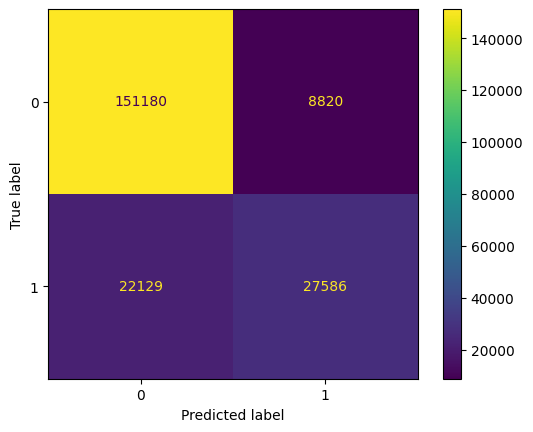

In [44]:
#Visualizing Model Results
t1 = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred))
t1.plot()

In [45]:
content = "@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right"
preprocessed_content = preprocess(content)
print(preprocessed_content)

stellargirl loooooooovvvvvveee kindle not dx cool fantastic right


In [46]:
final = tfid.transform([preprocessed_content])
model.predict(final)

array([4], dtype=int64)

In [47]:
import pickle
pickle.dump(tfid,open('tfidf.pkl','wb'))
pickle.dump(model, open('clf.pkl', 'wb'))

In [49]:
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('stopwords')

#loading models
model = pickle.load(open('clf.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))

def stopwordss():
    removed = []
    stopword = stopwords.words('english')
    print(len(stopword))
    for i in stopword:
        if "n't" in i:
            removed.append(i)
        if i == "not":
            removed.append(i)
    for i in removed:
        stopword.remove(i)
    return stopword



def preprocess(content,stopword):
    # sentence = nltk.sent_tokenize(i)
    sentence = re.sub(r'[^a-zA-Z\']',' ',content)
    sentence = re.sub(r'\s+', ' ', sentence).strip()
    sentence = sentence.lower()
    # sentence = nltk.word_tokenize(sentence)
    sentence = sentence.split()
    sentence = [lemmatizer.lemmatize(word) for word in sentence if not word in stopword]
    sentence = ' '.join(sentence)
    return sentence

def main():
    # st.title("Sentimental Analysis")

    # Input from user
    # user_input = st.text_input("Enter text here")
    user_input = "you are  bad"

    if user_input:
        stopword = stopwordss()
        sentence = preprocess(user_input,stopword)
        input_feature = tfidf.transform([sentence])
        prediction = model.predict(input_feature)

        # Display the prediction
        if prediction == 4:
            prediction = "Positive"
        elif prediction == 1:
            prediction = "Negative"
        # st.write("Predicted sentiment:", prediction)
        print(prediction)
    else:
        # st.write("Please enter some text.")
        print("some text")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to C:\Users\ROHIT
[nltk_data]     MOTWANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ROHIT
[nltk_data]     MOTWANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179
[0]
